<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/template_match_20241013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

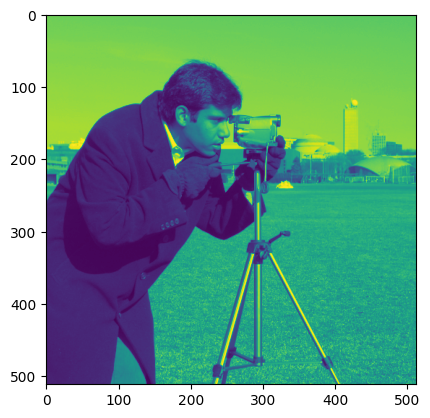

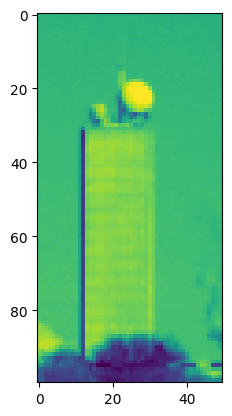

In [2]:
from skimage import data
import matplotlib.pyplot as plt

img1 = data.camera()
plt.imshow(img1)
plt.show()

img2 = img1[100:200,400:450]
plt.imshow(img2)

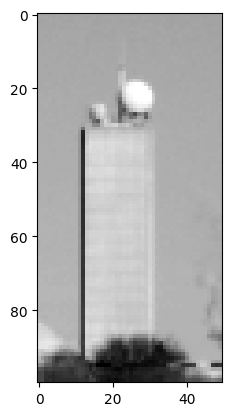

Template found at: y = 100, x = 400


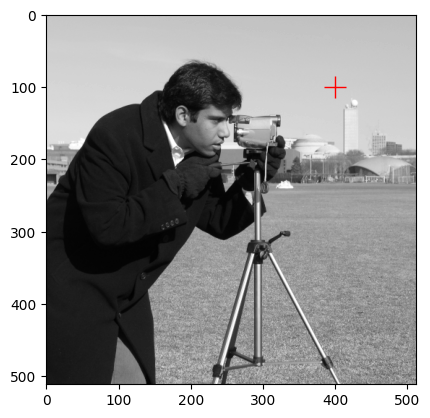

Template coordinates: y = 100, x = 400


In [6]:
from skimage.color import rgb2gray
import numpy as np
from skimage.feature import match_template

def find_template_2D(template, image):
    # Apply normalized cross-correlation
    result = match_template(image, template)

    # Find the location of the highest correlation
    yIndex, xIndex = np.unravel_index(np.argmax(result), result.shape)

    return yIndex, xIndex

# Load the image using imread
tablet_rgba = img1

"""
# If the image has an alpha channel, remove it by selecting only the first 3 channels (RGB)
if tablet_rgba.shape[2] == 4:
    tablet = tablet_rgba[:, :, :3]
else:
    tablet = tablet_rgba  # If no alpha channel, use the image as is

# Convert to grayscale
tablet = rgb2gray(tablet)
"""

tablet = tablet_rgba

# Continue with your code
#glyph = tablet[75:165, 150:185]
glyph = img2

# Show the glyph
plt.imshow(glyph, cmap='gray')
plt.show()

# Find the template in the image
y, x = find_template_2D(glyph, tablet)
print(f"Template found at: y = {y}, x = {x}")

# Plot where the template was found
plt.imshow(tablet, cmap='gray')
plt.plot(x, y, 'r+', markersize=16)  # Mark the found position with a red plus
plt.show()

# Display the coordinates
print(f"Template coordinates: y = {y}, x = {x}")

In [ ]:
    yIndex, xIndex = np.unravel_index(np.argmax(result), result.shape)


In [10]:
result = match_template(img1, img2)

print(np.argmax(result))
print(np.unravel_index(np.argmax(result), result.shape))


46700
(100, 400)


To store multi-dimensional blocks, their geometry must somehow be made to fit into linear memory. In C and NumPy, this is done row-by-row. A 2D example would be:


 0 1 2  3

 4 5 6  7

 8 9 10 11

So, for example, in this 3-by-4 block the 2D index (1, 2) would correspond to the linear index 6 which is 1 x 4 + 2.

unravel_index does the inverse. Given a linear index, it computes the corresponding ND index. Since this depends on the block dimensions, these also have to be passed. So, in our example, we can get the original 2D index (1, 2) back from the linear index 6:

>>> np.unravel_index(6, (3, 4))
(1, 2)